In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [82]:
df_tr = pd.read_csv("OnboardGPS.csv")[["Timpstemp", "lat", "lon"]].set_index("Timpstemp").drop_duplicates().reset_index()

df_tr.head()

,Timpstemp,lat,lon
0,7009129,47.384357,8.545178
1,7206967,47.384355,8.545179
2,7402809,47.384353,8.545179
3,7599573,47.384351,8.545180
4,7798438,47.384350,8.545180


In [83]:
df_acc = pd.read_csv("RawAccel.csv")

df_acc.head()

,Timpstemp,Error_count,x,y,z,temperature,range_rad_s,scaling,x_raw,y_raw,z_raw,temperature_raw,Unnamed: 12
0,7090906,0,0.244930,0.193673,-10.587221,9.648201,156.906403,0.004788,-20,-80,-2195,-9152,
1,7190913,0,0.191809,-0.487059,-9.608912,9.648201,156.906403,0.004788,107,-31,-1980,-9152,
2,7290907,0,0.004109,-0.240623,-8.075992,9.645430,156.906403,0.004788,-142,-86,-1600,-9153,
3,7391908,0,-0.854582,-0.515484,-8.208664,9.648201,156.906403,0.004788,-139,-146,-1726,-9152,
4,7490907,0,-0.537616,0.054402,-9.014673,9.637119,156.906403,0.004788,-40,-10,-1969,-9156,


angolo 45.0


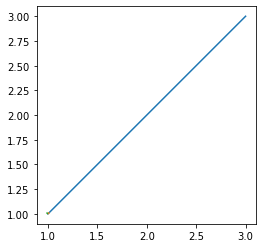

In [87]:
def plotSegment(lat1, lon1, lat2, lon2, acc_x, acc_y, acc_z):
    plt.plot([lat1, lat2], [lon1, lon2])
    d_lat = abs(lat2-lat1)
    d_lon = abs(lon2-lon1)
    
    theta = math.atan2(d_lat, d_lon)
    plt.gca().set_aspect('equal', adjustable='box')
    print(f"angolo {theta*180/math.pi}")
    plt.plot([lat1, lat1+d_lat*acc_x*math.cos(theta)/100], [lon1, lon1+d_lon*acc_x*math.sin(theta)/100], '--')
    plt.plot([lat1, lat1+d_lat*acc_x*math.cos(theta+math.pi/2)/100], [lon1, lon1+d_lon*acc_x*math.sin(theta+math.pi/2)/100], '--')
    
plotSegment(1,1,3,3,1,1,2)

In [88]:
def findNearest(timestamp, acc_np):
    prec = (-1, float("inf"))
    for i, row in enumerate(acc_np):
        if timestamp < row[0]:
            if abs(timestamp - row[0]) < prec[1]:
                return i
            else:
                return prec[0]
        prec = (i, timestamp - row[0])
    
    return prec[0]

[[2.69891460e+07 4.73843553e+01 8.54514270e+00]
 [2.71837780e+07 4.73843554e+01 8.54514160e+00]] best at199 [ 0.29212433 -0.55542946 -9.23044491]
angolo 5.194428599064581


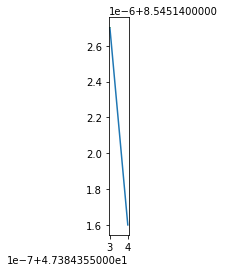

In [89]:
index = 100
gps = df_tr[["Timpstemp", "lat", "lon"]].values[index:index+2, :]
acc_index = findNearest(gps[0, 0], df_acc.values)
acc = df_acc[["x", "y", "z"]].values[acc_index, :]

print(gps, f"best at{acc_index}", acc)
plotSegment(gps[0, 1], gps[0, 2], gps[1, 1], gps[1, 2], acc[0], acc[1], acc[2])

In [77]:
(gps[0, 1], gps[0, 2], gps[1, 1], gps[1, 2], acc[0], acc[1], acc[2])

(47.3843507,
 8.5451956,
 47.3843507,
 8.5451956,
 0.060857817530632,
 -0.762070894241333,
 -9.18995761871338)